## **OpenAI SDK for Python Samples**

OpenAI Python SDK 市面上有两个版本，基于版本 0.28.1 或 1.x，主要针对不同 OpenAI 模型的 API 接入。 虽然很多相关的SDK还停留在 0.28.1 上，但随着时间的推移，1.x的SDK已经逐渐融入到了相关内容中。 因此，建议所有初学者使用最新的 OpenAI SDK

In [1]:
! pip install openai -U
! pip install python-dotenv -U
! pip install pillow -U

*引用 Azure OpenAI from OpenAI SDK*

In [2]:
import os
import dotenv
from openai import AzureOpenAI



In [3]:
dotenv.load_dotenv()

True

In [4]:
aoai_endpoint = os.environ['AZURE_OPENAI_ENDPOINT']
aoai_key = os.environ['AZURE_OPENAI_API_KEY']   
aoai_version = os.environ['AZURE_OPENAI_VERSION']  

### *init AzureOpenAI*

You need to get Azure OpenAI Service API Key and Endpoint in your azure portal

In [5]:
client = AzureOpenAI(
  azure_endpoint = aoai_endpoint, 
  api_key = aoai_key,  
  api_version = aoai_version
)

## **Text Completion**

Text Completion 是 OpenAI 最经典的功能。 您可以通过它生成文本。 在OpenAI中，我们最初使用 GPT-3 达芬奇模型进行文本补全。 现在我们使用 gpt-3.5-turbo-instruct 来实现文本补全。

OpenAI 的文本生成模型（通常称为生成式预训练 Transformer 或大型语言模型）经过训练可以理解自然语言、代码和图像。 这些模型提供文本输出来响应其输入。 这些模型的输入也称为“提示”。 设计提示本质上是如何“编程”大型语言模型，通常是通过提供说明或一些如何成功完成任务的示例。

使用 OpenAI 的文本生成模型，您可以构建应用程序来：

- 文件草案

- 编写计算机代码

- 回答有关知识库的问题

- 分析文本

- 为软件提供自然语言界面

- 一系列科目的导师

- 翻译语言

- 模拟游戏角色

In [6]:
response = client.completions.create(model='GPT3InstructModel' , prompt="How to learn AI", max_tokens=1000)

In [7]:
response.choices[0].text

'\n\n1. Understand the basics: Before diving into more complex concepts, it is important to have a clear understanding of the basics of AI. This includes knowing the definitions of key terms, such as machine learning, deep learning, and neural networks, and understanding how they are related.\n\n2. Learn programming languages: Knowledge of programming languages, such as Python and R, is essential for building AI applications. Make sure to learn the syntax, functions, and libraries specific to AI and machine learning.\n\n3. Take online courses: There are many online courses available for learning AI, ranging from introductory courses to more advanced ones. Some popular platforms for learning AI include Coursera, Udacity, and edX.\n\n4. Read books and articles: In addition to online courses, there are many books and articles available on AI that can provide in-depth knowledge and help you stay updated on the latest developments in the field.\n\n5. Join online communities and forums: Join

## **Chat Completion**

聊天模型将消息列表作为输入，并返回模型生成的消息作为输出。 尽管聊天格式旨在使多轮对话变得容易，但它对于没有任何对话的单轮任务也同样有用。

使用 Chat ，顾名思义就是在聊天场景中生成更多的上下文。 可以通过 gpt-4、gpt-4 Turbo、gpt-3.5-turbo 来实现这个场景

主要输入是 messages 参数。 消息必须是消息对象的数组，其中每个对象都有一个角色（“系统”、“用户”或“助理”）和内容。 对话可以短至一条消息，也可以来回多次。

通常，对话首先由系统消息格式化，然后是交替的用户消息和助理消息。

系统消息有助于设置助手的行为。 例如，您可以修改助手的个性或提供有关其在整个对话过程中应如何表现的具体说明。 但请注意，系统消息是可选的，没有系统消息的模型行为可能类似于使用通用消息，例如“你是一个有用的助手”。

用户消息提供助理响应的请求或评论。 助理消息存储以前的助理响应，但也可以由您编写以给出所需行为的示例。



In [8]:
response = client.chat.completions.create(
    model="GPT3Model", 
    messages=[
        {"role": "system", "content": "You are a AI teacher."},
        {"role": "user", "content": "Can you explain what is Machine Learning?"}
    ]
)

In [9]:
response.choices[0].message.content

'Machine learning is a subset of artificial intelligence that involves the development of algorithms and models that enable computers to learn from and make predictions or decisions based on data. \n\nInstead of being explicitly programmed, machine learning algorithms are trained on large datasets to automatically recognize patterns, make predictions, or take actions. These algorithms improve their performance over time by continuously learning from new data.\n\nThere are different types of machine learning algorithms, including supervised learning, unsupervised learning, and reinforcement learning. In supervised learning, the algorithm is trained on labeled data, where it learns to make predictions by finding patterns in the input features and the corresponding output labels. In unsupervised learning, the algorithm analyzes unlabeled data to discover patterns or relationships within the data. Reinforcement learning involves learning through interaction with an environment, where the a

## **Image generation**

从文本生成图像的能力是一个非常强大的功能。 OpenAI的图像生成主要基于DALL·E模型，现在主要依靠DALL·E 3进行配合。

Images API 提供了三种与图像交互的方法：

- 根据文本提示从头开始创建图像（DALL·E 3 和 DALL·E 2）
  
- 根据新的文本提示，通过让模型替换预先存在的图像的某些区域来创建图像的编辑版本（仅限 DALL·E 2）
  
- 创建现有图像的变体（仅限 DALL·E 2）

In [10]:
result = client.images.generate(
    model="Dalle3", 
    prompt="Chinese New Year picture for the Year of the Dragon",
    n=1
)

In [11]:
import os
import requests
from PIL import Image
import json

In [12]:
json_response = json.loads(result.model_dump_json())

In [13]:
image_dir = os.path.join(os.curdir, 'images')

In [14]:
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

In [15]:
image_path = os.path.join(image_dir, 'generated_image.png')

In [16]:
image_url = json_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

In [17]:
image = Image.open(image_path)

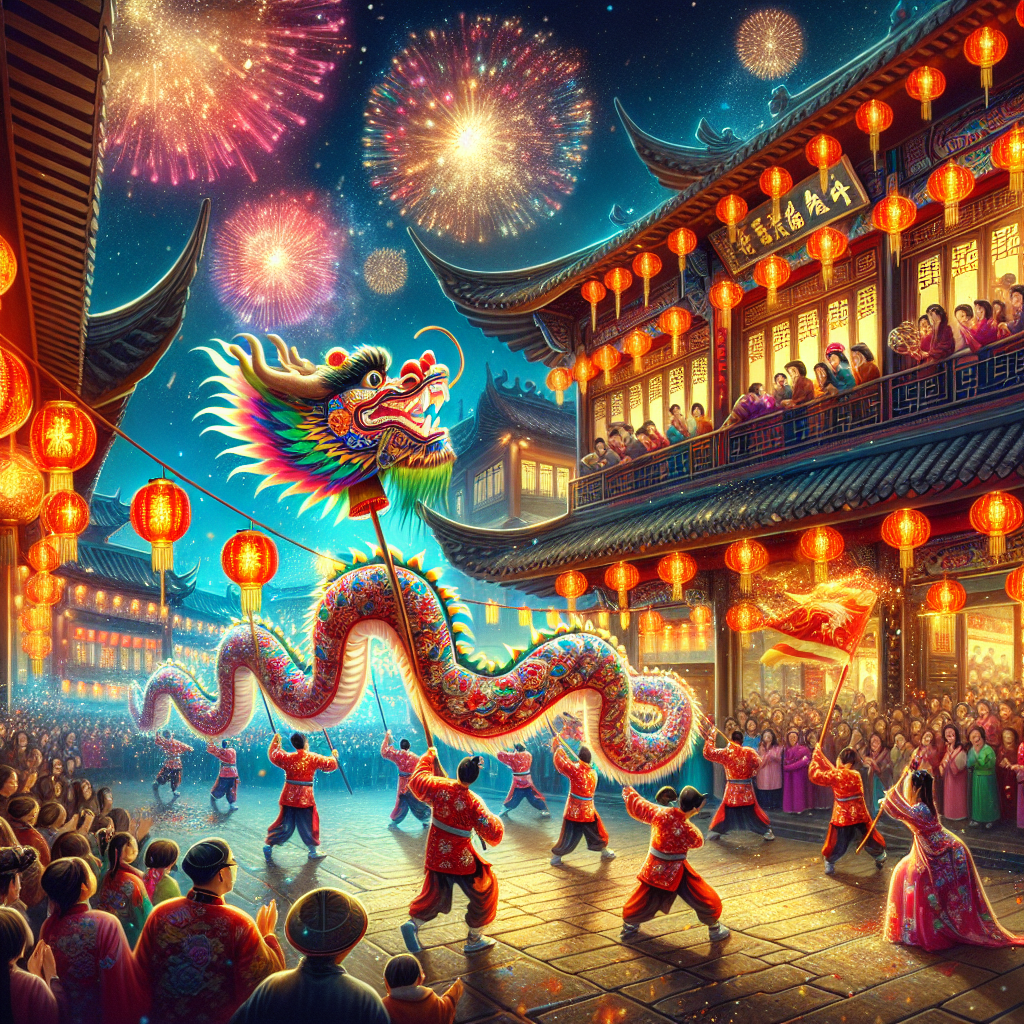

In [18]:

image